In [1]:
import spacy
import en_core_sci_scibert
import pandas as pd
from tqdm import tqdm

In [2]:
triples = pd.read_csv('../Files/triples.csv')
triples = triples.drop('Unnamed: 0',axis=1)
print(triples.head(),'\n',len(triples))

     sub_id relation    obj_id
0  C0439663    cross  C0011065
1  C0868928    cross  C0011065
2  C5203670    cause  C0023676
3  C5203670    cause  C0027361
4  C5203670    cause  C0454664 
 413094


In [3]:
rel = list(triples['relation'])

In [4]:
nlp = en_core_sci_scibert.load()

In [5]:
nlp.disable_pipes(['transformer', 'attribute_ruler', 'parser', 'ner'])

['transformer', 'attribute_ruler', 'parser', 'ner']

In [6]:
nlp.pipe_names

['tagger', 'lemmatizer']

In [ ]:
spacy.require_gpu(0)
lemr = []
for r in tqdm(rel):
    doc = nlp(r)
    lem = [tok.lemma_ for tok in doc]
    lemr.append(lem[0])

In [29]:
del nlp

In [3]:

nlp

In [19]:
doc = nlp("doing")

In [24]:
for tok in doc:
   print( tok.lemma_)

show


In [23]:
for _,row in tqdm(triples.iterrows()):
    doc = nlp(row[1])
    lemma = [tok.lemma_ for tok in doc]
    row[1] = lemma[0]

413094it [27:20, 251.83it/s]


In [25]:
len(triples.relation.unique())

2148

     sub_id relation    obj_id
0  C0439663    cross  C0011065
1  C0868928    cross  C0011065
2  C5203670    cause  C0023676
3  C5203670    cause  C0027361
4  C5203670    cause  C0454664 
 413094


413094it [00:28, 14409.79it/s]


In [7]:
len(triples['relation'].unique())

2445

<AxesSubplot:>

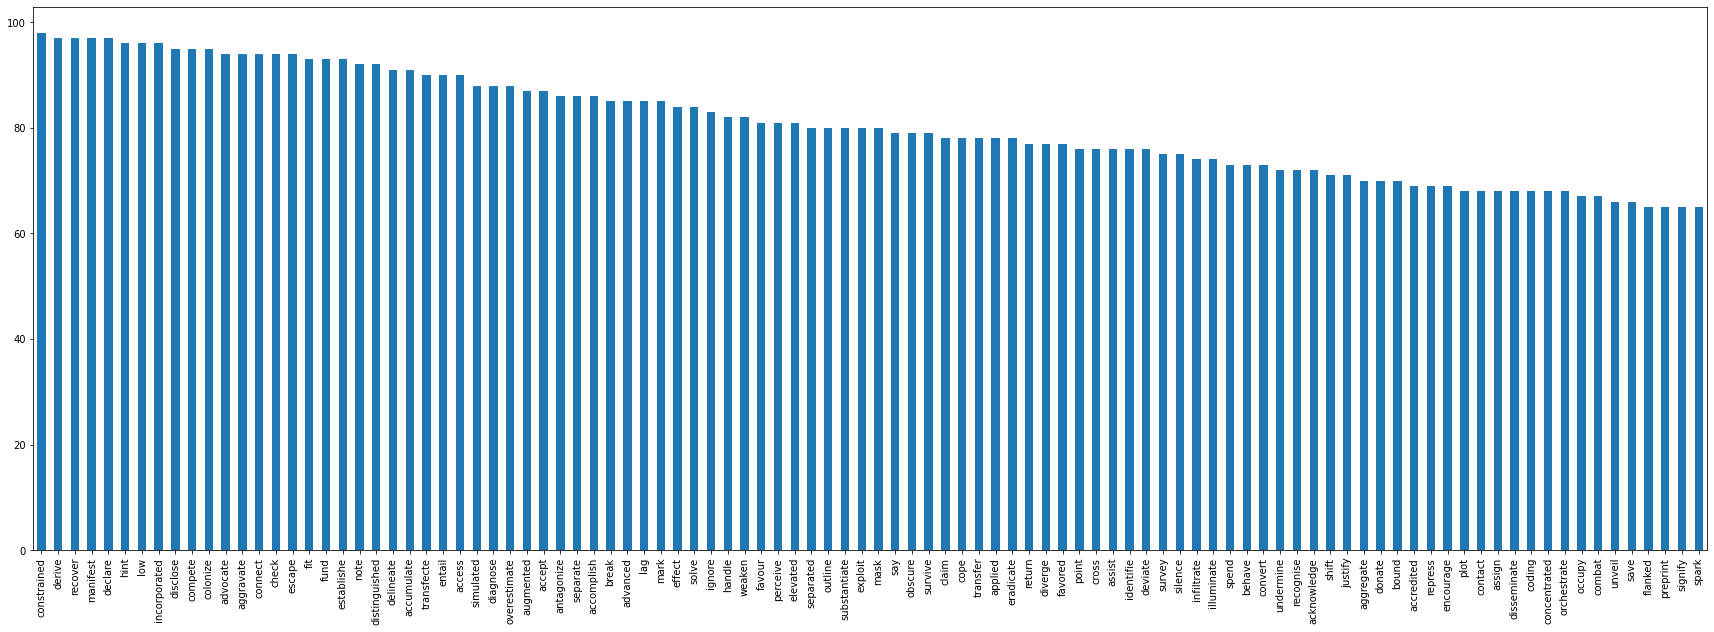

In [8]:
triples[r'relation'].value_counts()[402:502].plot(figsize=(30,10),kind='bar')

In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
nodes = pd.read_csv("../Files/Nodes.csv")
nodes = nodes.drop('Unnamed: 0', axis=1)
print(nodes.head(), '\n',len(nodes))

        cui                         semtyp               Name
0  C0439663                        Finding           Infected
1  C0868928             Functional Concept   Case (situation)
2  C5203670            Disease or Syndrome           COVID-19
3  C0008972              Research Activity  Clinical Research
4  C0034640  Natural Phenomenon or Process               Rain 
 29069


In [7]:
triples = pd.read_csv('../Files/triples.csv')
triples = triples.drop('Unnamed: 0',axis=1)
print(triples.head(),'\n',len(triples))

     sub_id relation    obj_id
0  C0439663    cross  C0011065
1  C0868928    cross  C0011065
2  C5203670    cause  C0023676
3  C5203670    cause  C0027361
4  C5203670    cause  C0454664 
 413094


Here we're trying to delete duplicated triples and self-loops triples just to make thing simpler

In [8]:
triples = triples.drop_duplicates()

In [9]:
c = 0
for index,row in tqdm(triples.iterrows()):
    if row[0] == row[2]:
        triples = triples.drop(index=index)
        c = +1

413094it [04:41, 1466.17it/s]


In [10]:
len(triples)

402562

In [13]:
nodes.semtyp = nodes.semtyp.astype('category')
nodes.dtypes

cui         object
semtyp    category
Name        object
dtype: object

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.catplot(y="semtyp", hue="cui", kind="count",
            palette="pastel", edgecolor=".6",
            data=nodes)

Text(0.5, 1.0, 'Dis')

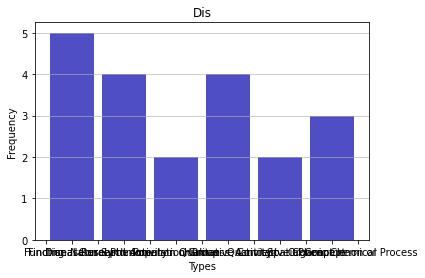

In [19]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=typesdf[0:20], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Dis')


In [12]:
target = ['Clinical Drug', "Disease or Syndrome", "Chemical", "Organic Chemical", "Virus", 'Injury or Poisoning',
        'Substance','Biologically Active Substance','Pharmacologic Substance','Pathologic Function','Sign or Symptom',
        'Organism',]

In [13]:
df = []

In [14]:
for _,row in tqdm(triples.iterrows()):
    sub = row[0]
    rel = row[1]
    obj = row[2]

    if cui_to_type(sub) in target and cui_to_type(obj) in target and sub != obj:
        
        df.append([sub, rel, obj])

    
len(df)

413094it [28:58, 237.59it/s]


11240

In [20]:
df[0:10]

[['C5203676', 'drive', 'C0206750'],
 ['C1175743', 'drive', 'C0206750'],
 ['C3698360', 'drive', 'C0206750'],
 ['C0206419', 'drive', 'C0206750'],
 ['C5203670', 'suggest', 'C0162633'],
 ['C5203670', 'suggest', 'C0729555'],
 ['C0032594', 'constitute', 'C0206419'],
 ['C0032285', 'cause', 'C0206419'],
 ['C0009450', 'depend', 'C0012634'],
 ['C0012634', 'increase', 'C0009450']]

In [16]:
import pickle

with open('new_triples2.pkl', 'wb') as f:
    pickle.dump(df,f)

In [21]:
new_triples = pd.DataFrame(df, columns=['s','p','0'])
print(len(new_triples))
new_triples.head()

11240


,s,p,0
0,C5203676,drive,C0206750
1,C1175743,drive,C0206750
2,C3698360,drive,C0206750
3,C0206419,drive,C0206750
4,C5203670,suggest,C0162633


In [22]:
new_triples = new_triples.drop_duplicates()
len(new_triples)

11240

In [3]:
def cui_to_type(cui):
    return  nodes["semtyp"].where(nodes['cui']==cui).dropna().reset_index(drop=True)[0]

def cui_to_name(cui):
    return nodes['Name'].where(nodes['cui']==cui).dropna().reset_index(drop=True)[0]

In [3]:
import pickle

with open('new_triples2.pkl', 'rb') as f:
    triples = pickle.load(f)

In [3]:
triples[0:10]

[['C5203676', 'drive', 'C0206750'],
 ['C1175743', 'drive', 'C0206750'],
 ['C3698360', 'drive', 'C0206750'],
 ['C0206419', 'drive', 'C0206750'],
 ['C5203670', 'suggest', 'C0162633'],
 ['C5203670', 'suggest', 'C0729555'],
 ['C0032594', 'constitute', 'C0206419'],
 ['C0032285', 'cause', 'C0206419'],
 ['C0009450', 'depend', 'C0012634'],
 ['C0012634', 'increase', 'C0009450']]

In [1]:
import numpy as np

In [6]:
np.asarray(triples)

array([['C5203676', 'drive', 'C0206750'],
       ['C1175743', 'drive', 'C0206750'],
       ['C3698360', 'drive', 'C0206750'],
       ...,
       ['C0206592', 'infect', 'C1167395'],
       ['C0035111', 'infect', 'C1167395'],
       ['C0037633', 'contain', 'C0033607']], dtype='<U16')

In [4]:
import numpy as np
import pickle
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline


In [5]:
with open('newt.pkl','rb') as f:
    triples = pickle.load(f)
len(triples)

6234

In [6]:
tf = TriplesFactory.from_labeled_triples(np.array(triples),create_inverse_triples=True,
                                            filter_out_candidate_inverse_relations=True)
                                           # metadata = nodes.values)

In [7]:
train, test, val = tf.split([.8,.1,.1])

using automatically assigned random_state=2780931194


In [10]:
train

TriplesFactory(num_entities=3092, num_relations=80, num_triples=4984, inverse_triples=True)

In [11]:
test

TriplesFactory(num_entities=3092, num_relations=40, num_triples=623, inverse_triples=False)

In [12]:
val

TriplesFactory(num_entities=3092, num_relations=40, num_triples=624, inverse_triples=False)

In [13]:
transEResult = pipeline(
                    training=train,
                    testing=test,
                    validation=val,
                    model='TransE',
                    stopper='early',
                    training_kwargs=dict(num_epochs=400)
                )

No random seed is specified. Setting to 2410550061.
INFO:pykeen.triples.triples_factory:Creating inverse triples.
Training epochs on cuda:   2%|▏         | 9/400 [00:02<01:22,  4.76epoch/s, loss=0.00167, prev_loss=0.00188]INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.
Training epochs on cuda:   5%|▍         | 19/400 [00:05<01:26,  4.42epoch/s, loss=0.000578, prev_loss=0.000637]INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 20.
Training epochs on cuda:   7%|▋         | 29/400 [00:07<01:23,  4.47epoch/s, loss=0.000238, prev_loss=0.000261]INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.training.trainin

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

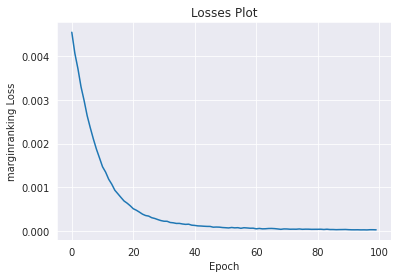

In [16]:
transEResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

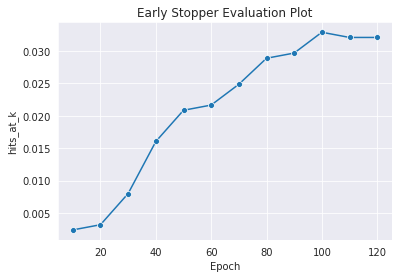

In [17]:
transEResult.plot_early_stopping()

In [21]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

transe = transEResult.model
results = evaluator.evaluate(transe, test.mapped_triples, additional_filter_triples=[train.mapped_triples,val.mapped_triples], batch_size=250)

Evaluating on cuda: 100%|██████████| 623/623 [00:00<00:00, 5.42ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds


In [22]:
transe = transEResult.model
results = evaluator.evaluate(transe, test.mapped_triples, additional_filter_triples=[train.mapped_triples,val.mapped_triples], batch_size=250)
print(
    'mean_rank: ',results.get_metric('mean_rank'), 
    '\nmean_reciprocal_rank: ',results.get_metric('mean_reciprocal_rank'),
    '\nadjusted_mean_rank_index: ',results.get_metric('adjusted_mean_rank_index'),
    '\nhits@k: ',results.get_metric('hits@k')
)

mean_rank:  1102.9903691813804 
mean_reciprocal_rank:  0.010845555156204452 
adjusted_mean_rank_index:  0.2859518297783381 
hits@k:  0.028892455858747994


In [24]:
transepredictions = transe.get_all_prediction_df(k=100, triples_factory=train, batch_size=1000, return_tensors=False, add_novelties=True, remove_known=True, testing=test.mapped_triples)
tp = []
for _,row in tqdm(transepredictions.iterrows()):
    tp.append((cui_to_name(row[1]),cui_to_name(row[5])))

In [45]:
transepredictions

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,108,C0004120,76,[UNKNOWN_RELATION],108,C0004120,-2.87939
1,107,C0004096,76,[UNKNOWN_RELATION],107,C0004096,-2.87939
2,109,C0004238,76,[UNKNOWN_RELATION],109,C0004238,-2.87939
3,110,C0004364,76,[UNKNOWN_RELATION],110,C0004364,-2.87939
4,82,C0003261,76,[UNKNOWN_RELATION],82,C0003261,-2.87939
...,...,...,...,...,...,...,...
95,18,C0001347,76,[UNKNOWN_RELATION],18,C0001347,-2.87939
96,53,C0002362,76,[UNKNOWN_RELATION],53,C0002362,-2.87939
97,52,C0002345,76,[UNKNOWN_RELATION],52,C0002345,-2.87939
98,50,C0002085,76,[UNKNOWN_RELATION],50,C0002085,-2.87939


In [43]:
tp = []
for _,row in tqdm(transepredictions.iterrows()):
    tp.append((cui_to_name(row[1]),cui_to_name(row[5])))

100it [00:00, 136.43it/s]


In [44]:
tp

[('Astrovirus', 'Astrovirus'),
 ('Asthma', 'Asthma'),
 ('Atrial Fibrillation', 'Atrial Fibrillation'),
 ('Autoimmune Diseases', 'Autoimmune Diseases'),
 ('Antibody Formation', 'Antibody Formation'),
 ('Macrolide Antibiotics', 'Macrolide Antibiotics'),
 ('Antibody-Dependent Cellular Cytotoxicity',
  'Antibody-Dependent Cellular Cytotoxicity'),
 ('Anticoagulants', 'Anticoagulants'),
 ('Anorexia', 'Anorexia'),
 ('Anopheles Genus', 'Anopheles Genus'),
 ('Angiotensin-Converting Enzyme Inhibitors',
  'Angiotensin-Converting Enzyme Inhibitors'),
 ('Animal Diseases', 'Animal Diseases'),
 ('Anti-Inflammatory Agents', 'Anti-Inflammatory Agents'),
 ('Anthocyanins', 'Anthocyanins'),
 ('Antibiotics', 'Antibiotics'),
 ('Antibiotics, Aminoglycoside', 'Antibiotics, Aminoglycoside'),
 ('Arachidonate 5-Lipoxygenase', 'Arachidonate 5-Lipoxygenase'),
 ('APT compounds', 'APT compounds'),
 ('Aortic Valve Stenosis', 'Aortic Valve Stenosis'),
 ('Apolipoprotein E', 'Apolipoprotein E'),
 ('Antioxidants', 'Antio

# TransH

In [7]:
transHResult = pipeline(
                    training=train,
                    testing=test,
                    validation=val,
                    model='TransH',
                    stopper='early',
                    training_kwargs=dict(num_epochs=400)
                )

No random seed is specified. Setting to 1203782481.
INFO:pykeen.triples.triples_factory:Creating inverse triples.
Training epochs on cuda:   2%|▏         | 9/400 [00:02<01:45,  3.72epoch/s, loss=2.52, prev_loss=2.96]INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.23s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.
Training epochs on cuda:   5%|▍         | 19/400 [00:06<01:47,  3.53epoch/s, loss=0.168, prev_loss=0.282]INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 20.
Training epochs on cuda:   7%|▋         | 29/400 [00:09<01:41,  3.67epoch/s, loss=0.00386, prev_loss=0.00387]INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
INFO:pykeen.training.training_loop:=> Save

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

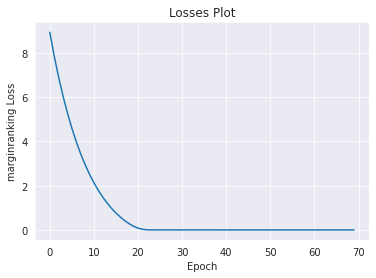

In [8]:
transHResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

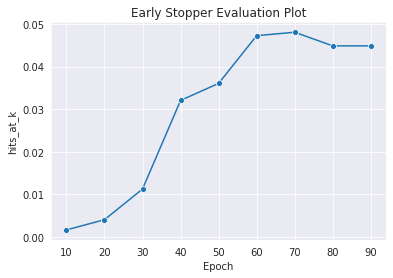

In [9]:
transHResult.plot_early_stopping()

In [11]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()
transh = transHResult.model
results = evaluator.evaluate(transh, test.mapped_triples, additional_filter_triples=[train.mapped_triples,val.mapped_triples], batch_size=250)
print(
    'mean_rank: ',results.get_metric('mean_rank'), 
    '\nmean_reciprocal_rank: ',results.get_metric('mean_reciprocal_rank'),
    '\nadjusted_mean_rank_index: ',results.get_metric('adjusted_mean_rank_index'),
    '\nhits@k: ',results.get_metric('hits@k')
)

Evaluating on cuda: 100%|██████████| 623/623 [00:00<00:00, 2.48ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.26s seconds


mean_rank:  1184.215489566613 
mean_reciprocal_rank:  0.023893983677552275 
adjusted_mean_rank_index:  0.2334089202629822 
hits@k:  0.04253611556982344


In [21]:
#transhpredictions = transh.get_all_prediction_df(k=100, triples_factory=train, batch_size=500, return_tensors=False, add_novelties=True, remove_known=True, testing=test.mapped_triples)
tp = []
for _,row in tqdm(transhpredictions.iterrows()):
    tp.append((cui_to_name(row[1]),row[3],cui_to_name(row[5])))

100it [00:00, 139.28it/s]


In [23]:
tp

[('coenzyme A', 'trigger', 'DNA Replication'),
 ('Cardiac Glycosides', 'altered', 'Mutation'),
 ('Cardiac Glycosides', 'upregulate', 'Compound (substance)'),
 ('Cardiac Glycosides', 'upregulate', 'U 18666A'),
 ('Cardiac Glycosides', 'upregulate', 'Inhibitor'),
 ('adenosine triphosphate', 'trigger', 'DNA Replication'),
 ('Cardiac Glycosides', 'upregulate', 'chloroquine'),
 ('Butyrates', 'alter', 'DNA Replication'),
 ('Butyrates', 'alter', 'Communicable Diseases'),
 ('Cardiac Glycosides', 'upregulate', 'GEN1 gene'),
 ('Cardiac Glycosides', 'upregulate', 'Corticosterone'),
 ('Cardiac Glycosides', 'upregulate', 'guanine analog'),
 ('Butyrates', 'alter', 'SARS-CoV-2'),
 ('Cardiac Glycosides', 'upregulate', 'Colicin Plasmids'),
 ('Cardiac Glycosides', 'upregulate', 'Tunicamycin'),
 ('Cardiac Glycosides', 'upregulate', 'Protein Overexpression'),
 ('chloroquine', 'trigger', 'DNA Replication'),
 ('Breeding', 'trigger', 'DNA Replication'),
 ('Cardiac Glycosides', 'upregulate', 'GSK983'),
 ('Card

# TransR

In [8]:
transRResult = pipeline(
                    training=train,
                    testing=test,
                    validation=val,
                    model='TransR',
                    stopper='early',
                    training_kwargs=dict(num_epochs=400)
                )

No random seed is specified. Setting to 2887642235.
INFO:pykeen.triples.triples_factory:Creating inverse triples.
Training epochs on cuda:   2%|▏         | 9/400 [00:03<02:09,  3.02epoch/s, loss=0.00256, prev_loss=0.00264]INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.
Training epochs on cuda:   7%|▋         | 29/400 [00:10<02:03,  3.00epoch/s, loss=0.000938, prev_loss=0.00101]INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 30.
Training epochs on cuda:  10%|▉         | 39/400 [00:14<02:00,  3.01epoch/s, loss=0.000556, prev_loss=0.000597]INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.training.training_

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

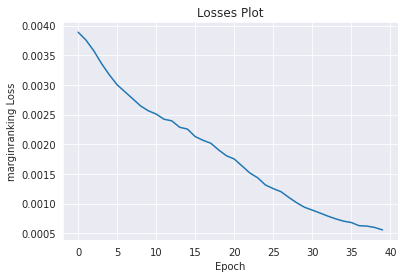

In [15]:
transRResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

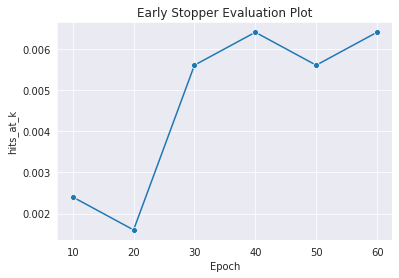

In [16]:
transRResult.plot_early_stopping()

In [12]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

transr = transRResult.model
results = evaluator.evaluate(transr, test.mapped_triples, additional_filter_triples=[train.mapped_triples,val.mapped_triples], batch_size=250)
print(
    'mean_rank: ',results.get_metric('mean_rank'), 
    '\nmean_reciprocal_rank: ',results.get_metric('mean_reciprocal_rank'),
    '\nadjusted_mean_rank_index: ',results.get_metric('adjusted_mean_rank_index'),
    '\nhits@k: ',results.get_metric('hits@k')
)

Evaluating on cuda: 100%|██████████| 623/623 [00:00<00:00, 3.24ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.20s seconds


mean_rank:  1501.2443820224719 
mean_reciprocal_rank:  0.003890586366905666 
adjusted_mean_rank_index:  0.027810037253410136 
hits@k:  0.006420545746388443


In [ ]:
transrpredictions = transr.get_all_prediction_df(k=100, triples_factory=train, batch_size=250, return_tensors=False, add_novelties=True, remove_known=True, testing=test.mapped_triples)
tp = []
for _,row in tqdm(transrpredictions.iterrows()):
    tp.append((cui_to_name(row[1]),row[3],cui_to_name(row[5])))
tp

# ComplEx

In [24]:
complExResult = pipeline(
                    training=train,
                    testing=test,
                    validation=val,
                    model='complex',
                    stopper='early',
                    training_kwargs=dict(num_epochs=400)
                )

INFO:pykeen.triples.triples_factory:Creating inverse triples.
Training epochs on cuda:   2%|▏         | 9/400 [00:03<02:12,  2.95epoch/s, loss=0.037, prev_loss=0.0384]INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.70s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.
Training epochs on cuda:   5%|▍         | 19/400 [00:08<02:17,  2.77epoch/s, loss=0.0201, prev_loss=0.0217]INFO:pykeen.evaluation.evaluator:Evaluation took 0.69s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 20.
Training epochs on cuda:  10%|▉         | 39/400 [00:16<02:06,  2.85epoch/s, loss=0.0078, prev_loss=0.0079]INFO:pykeen.evaluation.evaluator:Evaluation took 0.68s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early after 4 evaluations at epoch 40. The best

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

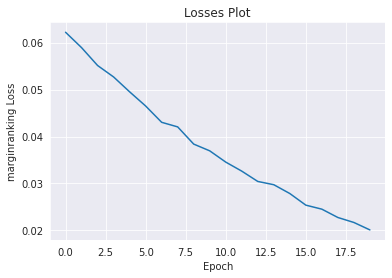

In [25]:
complExResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

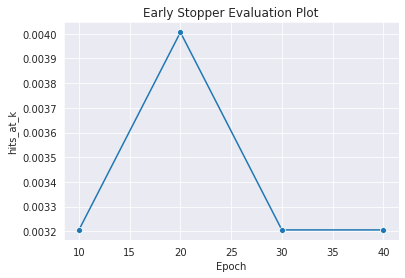

In [26]:
complExResult.plot_early_stopping()

In [28]:
comp = complExResult.model
results = evaluator.evaluate(comp, test.mapped_triples, additional_filter_triples=[train.mapped_triples,val.mapped_triples], batch_size=200)
print(
    'mean_rank: ',results.get_metric('mean_rank'), 
    '\nmean_reciprocal_rank: ',results.get_metric('mean_reciprocal_rank'),
    '\nadjusted_mean_rank_index: ',results.get_metric('adjusted_mean_rank_index'),
    '\nhits@k: ',results.get_metric('hits@k')
)

Evaluating on cuda: 100%|██████████| 623/623 [00:00<00:00, 864triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.73s seconds


mean_rank:  1552.3025682182986 
mean_reciprocal_rank:  0.0021619229088831833 
adjusted_mean_rank_index:  -0.005276742960832248 
hits@k:  0.0016051364365971107


In [38]:
#comppredictions = comp.get_all_prediction_df(k=100, triples_factory=train, batch_size=100, return_tensors=False, add_novelties=True, remove_known=True, testing=test.mapped_triples)
tp = []
for _,row in tqdm(comppredictions.iterrows()):
    tp.append((cui_to_name(row[1]),row[3],cui_to_name(row[5])))

100it [00:00, 138.56it/s]


In [39]:
tp

[('Animal Viruses', '[UNKNOWN_RELATION]', 'Animal Viruses'),
 ('ADENOSINE DEAMINASE',
  '[UNKNOWN_RELATION]',
  'microtubule-associated protein 1B'),
 ('Anticoagulants', '[UNKNOWN_RELATION]', 'Human Papillomavirus-35'),
 ('Refractory anemias', '[UNKNOWN_RELATION]', 'CASP8AP2 gene'),
 ('Anopheles Genus', '[UNKNOWN_RELATION]', 'Platelet aggregation'),
 ('Antibiotics', '[UNKNOWN_RELATION]', 'Cardiotonic Agents'),
 ('Antihypertensive Agents', 'bound', 'PAX3 gene'),
 ('Adenosine Diphosphate Ribose', '[UNKNOWN_RELATION]', 'HMGB1 Protein'),
 ('Macrolide Antibiotics', 'reinforce', 'Cyclooxygenase Inhibitors'),
 ('Acids', '[UNKNOWN_RELATION]', 'heparin'),
 ('Angiotensin-Converting Enzyme Inhibitors', 'impede', 'Oncogene, FPS-FES'),
 ('Adenoviruses, Human', 'reproduce', 'Immunoregulation'),
 ('ethanol', 'delay', 'ATF6 gene'),
 ('Amyotrophic Lateral Sclerosis', '[UNKNOWN_RELATION]', 'Mustard Gas'),
 ('Anorexia', 'bound', 'Adipogenesis'),
 ('1-Methyl-4-phenyl-1,2,3,6-tetrahydropyridine', 'augment'

# ConvE

In [33]:
convEResult = pipeline(
                    training=train,
                    testing=test,
                    validation=val,
                    model='conve',
                    stopper='early',
                    training_kwargs=dict(num_epochs=400)
                )

INFO:pykeen.models.unimodal.conv_e:Resolving None * None * None = 200.
INFO:pykeen.models.unimodal.conv_e:Resolved to 1 * 20 * 10 = 200.
INFO:pykeen.triples.triples_factory:Creating inverse triples.
INFO:pykeen.training.training_loop:Dropping last (incomplete) batch each epoch (1/9968 (0.01%) batches).
Training epochs on cuda:   2%|▏         | 9/400 [00:11<07:04,  1.09s/epoch, loss=0.0013, prev_loss=0.00146]INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 10.
Training epochs on cuda:   5%|▍         | 19/400 [00:22<06:56,  1.09s/epoch, loss=0.000492, prev_loss=0.000505]INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 20.
Training epoc

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

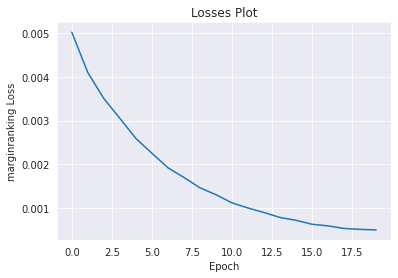

In [34]:
convEResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

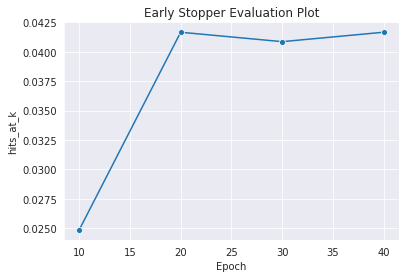

In [36]:
convEResult.plot_early_stopping()

In [37]:
conve = convEResult.model
results = evaluator.evaluate(conve, test.mapped_triples, additional_filter_triples=[train.mapped_triples,val.mapped_triples], batch_size=200)
print(
    'mean_rank: ',results.get_metric('mean_rank'), 
    '\nmean_reciprocal_rank: ',results.get_metric('mean_reciprocal_rank'),
    '\nadjusted_mean_rank_index: ',results.get_metric('adjusted_mean_rank_index'),
    '\nhits@k: ',results.get_metric('hits@k')
)

Evaluating on cuda: 100%|██████████| 623/623 [00:00<00:00, 13.2ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


mean_rank:  923.6516853932584 
mean_reciprocal_rank:  0.023736862441190592 
adjusted_mean_rank_index:  0.402102271870321 
hits@k:  0.04173354735152488


In [40]:
convepredictions = conve.get_all_prediction_df(k=100, triples_factory=train, batch_size=100, return_tensors=False, add_novelties=True, remove_known=True, testing=test.mapped_triples)
tp = []
for _,row in tqdm(convepredictions.iterrows()):
    tp.append((cui_to_name(row[1]),row[3],cui_to_name(row[5])))

100it [00:00, 135.12it/s]


In [41]:
tp

[('Air (substance)', 'trigger', 'Protein Overexpression'),
 ('acyclovir', 'host', 'Deubiquitination'),
 ('Acids', 'interfere', 'Bunyaviridae'),
 ('Acids', '[UNKNOWN_RELATION]', 'Bunyaviridae'),
 ('acyclovir', 'limit', 'Deubiquitination'),
 ('Acids', '[UNKNOWN_RELATION]', 'Bunyaviridae'),
 ('Acids', '[UNKNOWN_RELATION]', 'Bunyaviridae'),
 ('Acquired Immunodeficiency Syndrome', '[UNKNOWN_RELATION]', 'Lipids'),
 ('methanol', '[UNKNOWN_RELATION]', 'oseltamivir'),
 ('aminoglutethimide', 'stimulate', 'GRAP2 gene'),
 ('Acids', 'alter', 'Bunyaviridae'),
 ('Acids', '[UNKNOWN_RELATION]', 'Bunyaviridae'),
 ('Acids', 'accelerate', 'Bunyaviridae'),
 ('Animal Viruses', '[UNKNOWN_RELATION]', 'Coinfection'),
 ('eicosapentaenoic acid', '[UNKNOWN_RELATION]', 'HMOX1 gene'),
 ('Adenovirus Infections',
  '[UNKNOWN_RELATION]',
  'Pharmaceutical Preparations'),
 ('Anopheles Genus', '[UNKNOWN_RELATION]', 'Enzymes'),
 ('methanol', '[UNKNOWN_RELATION]', 'oseltamivir'),
 ('Acids', '[UNKNOWN_RELATION]', 'Bunyavir

# Previous 

In [39]:
# Save all the pretrained models

transEResult.save_to_directory('models/transE')
transHResult.save_to_directory('models/transH')
transRResult.save_to_directory('models/transR')
complExResult.save_to_directory('models/complex')
convEResult.save_to_directory('model/sconve')

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

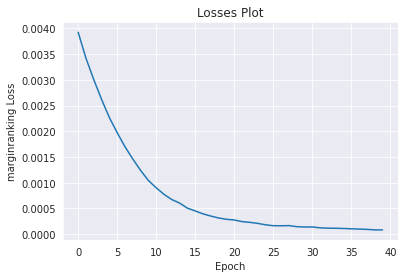

In [50]:
transEResult.plot_losses()


<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

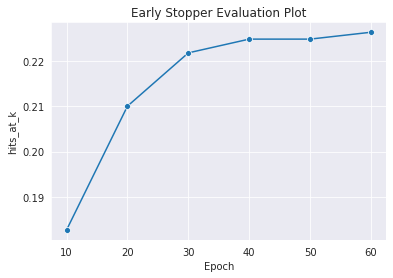

In [52]:
transEResult.plot_early_stopping()

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

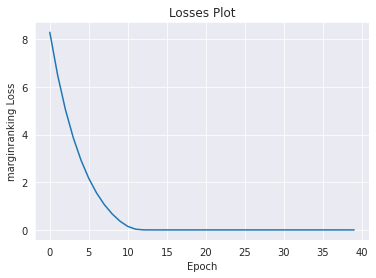

In [44]:
transHResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

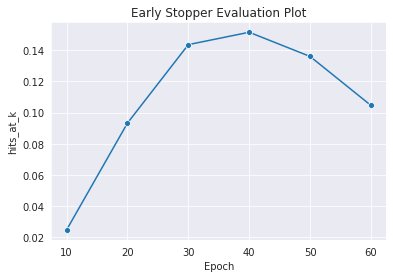

In [53]:
transHResult.plot_early_stopping()

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

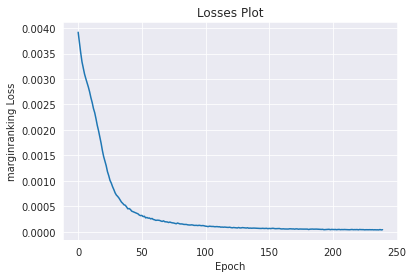

In [43]:
transRResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

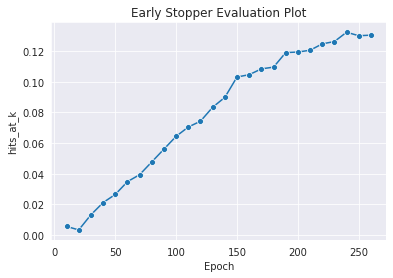

In [57]:
transRResult.plot_early_stopping()

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

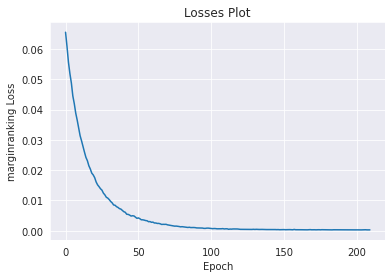

In [45]:
complExResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

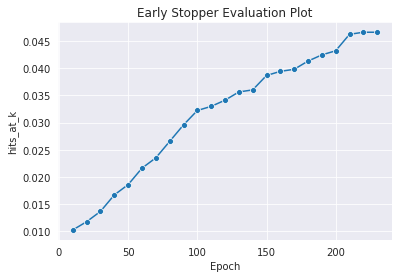

In [55]:
complExResult.plot_early_stopping()

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

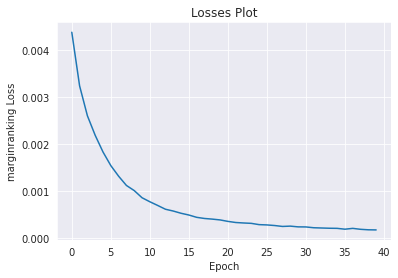

In [46]:
convEResult.plot_losses()

<AxesSubplot:title={'center':'Early Stopper Evaluation Plot'}, xlabel='Epoch', ylabel='hits_at_k'>

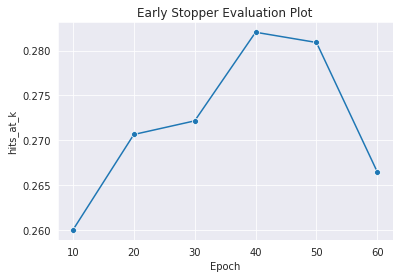

In [56]:
convEResult.plot_early_stopping()

In [6]:
import torch 

#transE = torch.load('models/transE/trained_model.pkl')
#transH = torch.load('models/transH/trained_model.pkl')
#transR = torch.load('models/transR/trained_model.pkl')
complEx = torch.load('models/complex/trained_model.pkl')
#convE = torch.load('model/sconve/trained_model.pkl')

In [14]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

In [62]:
results = evaluator.evaluate(convE, test.mapped_triples, batch_size=250)

The filtered setting was enabled, but there were no `additional_filtered_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filtered_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filtered_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cuda: 100%|██████████| 2.63k/2.63k [00:00<00:00, 15.9ktriple/s]


In [63]:
results.get_metric('mean_rank')
results.get_metric('mean_reciprocal_rank')
results.get_metric('adjusted_mean_rank_index')
results.get_metric('hits@k')

178.5998102466793

In [64]:
results.get_metric('mean_reciprocal_rank')

0.2542510022241017

In [65]:
results.get_metric('adjusted_mean_rank_index')

0.8816426034072276

In [66]:
results.get_metric('hits@k')

0.4265654648956357

In [67]:
results.get_metric('hits@3')

0.2650853889943074

In [9]:
Transpredictions = transE.get_all_prediction_df(k=100, triples_factory=train, batch_size=500, return_tensors=False, add_novelties=True, remove_known=True, testing=None)

_predict is an expensive operation, involving 13689337662 score evaluations.
/home/youssef/.local/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [10]:
Transpredictions.head()

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,22,C0001311,762,[UNKNOWN_RELATION],2522,C1449556,-3.319347
1,486,C0016410,762,[UNKNOWN_RELATION],2486,C1275126,-3.319347
2,434,C0014493,762,[UNKNOWN_RELATION],2434,C1136116,-3.319347
3,484,C0016330,762,[UNKNOWN_RELATION],2484,C1265378,-3.319347
4,358,C0012431,762,[UNKNOWN_RELATION],2358,C0949792,-3.319347


In [12]:
TransHpredictions = transH.get_all_prediction_df(k=100, triples_factory=train, batch_size=500, return_tensors=False, add_novelties=True, remove_known=True, testing=None)

_predict is an expensive operation, involving 13689337662 score evaluations.


In [15]:
TransHpredictions.to_csv('TransHpredictions.to_csv')

In [21]:
torch.cuda.empty_cache()

In [8]:
TransRpredictions = transR.get_all_prediction_df(k=100, triples_factory=train, batch_size=500, return_tensors=False, add_novelties=True, remove_known=True, testing=None)

_predict is an expensive operation, involving 13689337662 score evaluations.
/home/youssef/.local/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [11]:
TransRpredictions.to_csv('TransRpredictions.csv')

In [7]:
complexpredictions = complEx.get_all_prediction_df(k=100, triples_factory=train, batch_size=250, return_tensors=False, add_novelties=True, remove_known=True, testing=None)

_predict is an expensive operation, involving 13689337662 score evaluations.
/home/youssef/.local/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [9]:
complexpredictions.to_csv('complexpredictions.csv')

In [9]:
covEpredictions = convE.get_all_prediction_df(k=100, triples_factory=train, batch_size=1000, return_tensors=False, add_novelties=True, remove_known=True, testing=None)

_predict is an expensive operation, involving 13689337662 score evaluations.
/home/youssef/.local/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [17]:
covEpredictions.to_csv('covEpredictions.to_csv')